# Producing the main figure for the paper

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from dispersion import *

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the Gaia-McQuillan crossmatch and make cuts.

In [76]:
gaia_mc0 = pd.read_csv("gaia_mc.csv")
print(np.shape(gaia_mc0))

# Cut out visual binaries.
gaia_mc1 = gaia_mc0.iloc[gaia_mc0.flag.values == 1]
print(np.shape(gaia_mc1), "no visual binaries or subgiants")

# Cut out stars with large vb uncertainties.
m = gaia_mc1.vb_err.values < 1.
print(np.shape(gaia_mc1.iloc[m]), "no large vb uncertainties")

m &= gaia_mc1.phot_g_mean_mag.values < 16.
print(np.shape(gaia_mc1.iloc[m]), "no faint stars")

# Cut out rapid rotators (synchronized binaries)
m &= gaia_mc1.age.values > .5
print(np.shape(gaia_mc1.iloc[m]), "no rapid rotators")

# Cut out very hot and very cold stars. The hot limit is usually 5000 and the cool usually 3500
mint, maxt = 4000, 5000
m &= (gaia_mc1.color_teffs.values < maxt) * (mint < gaia_mc1.color_teffs.values)
print(np.shape(gaia_mc1.iloc[m]), "no hot or cold stars")

# Try cutting out stars with latitudes greater than bmax degrees
bmax = 15
m &= gaia_mc1.b.values < bmax
print(np.shape(gaia_mc1.iloc[m]), "no high latitude stars")

# # Restrict to stars with Vz
# m &= np.isfinite(gaia_mc1.vz.values)
# print(np.shape(gaia_mc1.iloc[m]), "only stars with Vz")

gaia_mc = gaia_mc1.iloc[m]

(29727, 157)
(10544, 157) no visual binaries or subgiants
(10405, 157) no large vb uncertainties
(10274, 157) no faint stars
(9684, 157) no rapid rotators
(5567, 157) no hot or cold stars
(3597, 157) no high latitude stars


Make cuts in log age.

In [82]:
age_bins = 10**np.linspace(np.log10(.5), np.log10(4.5), 7)
# age_bins = 10**np.linspace(np.log10(.5), np.log10(3.5), 7)
mid_age_bins = age_bins[:-1] + .5*np.diff(age_bins)
age_masks = select_stars(gaia_mc, age_bins, "age")

Set up color values.

In [83]:
cmap = plt.cm.get_cmap('viridis_r')
vmin, vmax = np.log10(1e9*min(mid_age_bins)), np.log10(1e9*max(mid_age_bins))
log_agebins = np.log10(age_bins*1e9)
age_midbin = np.diff(log_agebins)*.5 + log_agebins[:-1]
color_values = (age_midbin - vmin)/(vmax - vmin)
rgba = cmap(color_values)

Format data.

In [84]:
x = gaia_mc.color_teffs.values
y = gaia_mc.Prot.values
v = gaia_mc.vb.values
verr = gaia_mc.vb_err.values
xerr = np.ones_like(x)*100
xlim = (maxt + 100, mint - 200)

tbins = np.linspace(min(x), max(x), 10)
ds, derrs = [np.zeros((len(age_bins), len(tbins[:-1]))) for i in range(2)]

In [85]:
def betterstep_scatter(bins, y, c, label, **kwargs):
    new_x = [a for row in zip(bins[:-1], bins[1:]) for a in row]
    new_y = [a for row in zip(y, y) for a in row]
    ax = kwargs.pop("ax", plt.gca())
    ax.plot(new_x, new_y, color=c, lw=2, rasterized=True, label=label)

Make main figure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

niter =  2 4 stars removed kurtosis =  0.07162305912447886
niter =  2 1 stars removed kurtosis =  -0.1433976759368618
niter =  3 2 stars removed kurtosis =  -0.39727573507048897
niter =  2 2 stars removed kurtosis =  -0.059038338650986955
niter =  3 2 stars removed kurtosis =  0.15426870048561758
niter =  2 3 stars removed kurtosis =  -0.11178570351615535
niter =  2 4 stars removed kurtosis =  0.07162305912447886


  8%|▊         | 78/1000 [00:00<00:01, 775.46it/s]

niter =  2 1 stars removed kurtosis =  -0.1433976759368618


  8%|▊         | 81/1000 [00:00<00:01, 805.17it/s]

niter =  3 2 stars removed kurtosis =  -0.39727573507048897


  8%|▊         | 76/1000 [00:00<00:01, 755.19it/s]

niter =  2 2 stars removed kurtosis =  -0.059038338650986955


  7%|▋         | 73/1000 [00:00<00:01, 723.08it/s]

niter =  3 2 stars removed kurtosis =  0.15426870048561758


  8%|▊         | 77/1000 [00:00<00:01, 765.72it/s]

niter =  2 3 stars removed kurtosis =  -0.11178570351615535


100%|██████████| 1000/1000 [00:01<00:00, 782.69it/s]


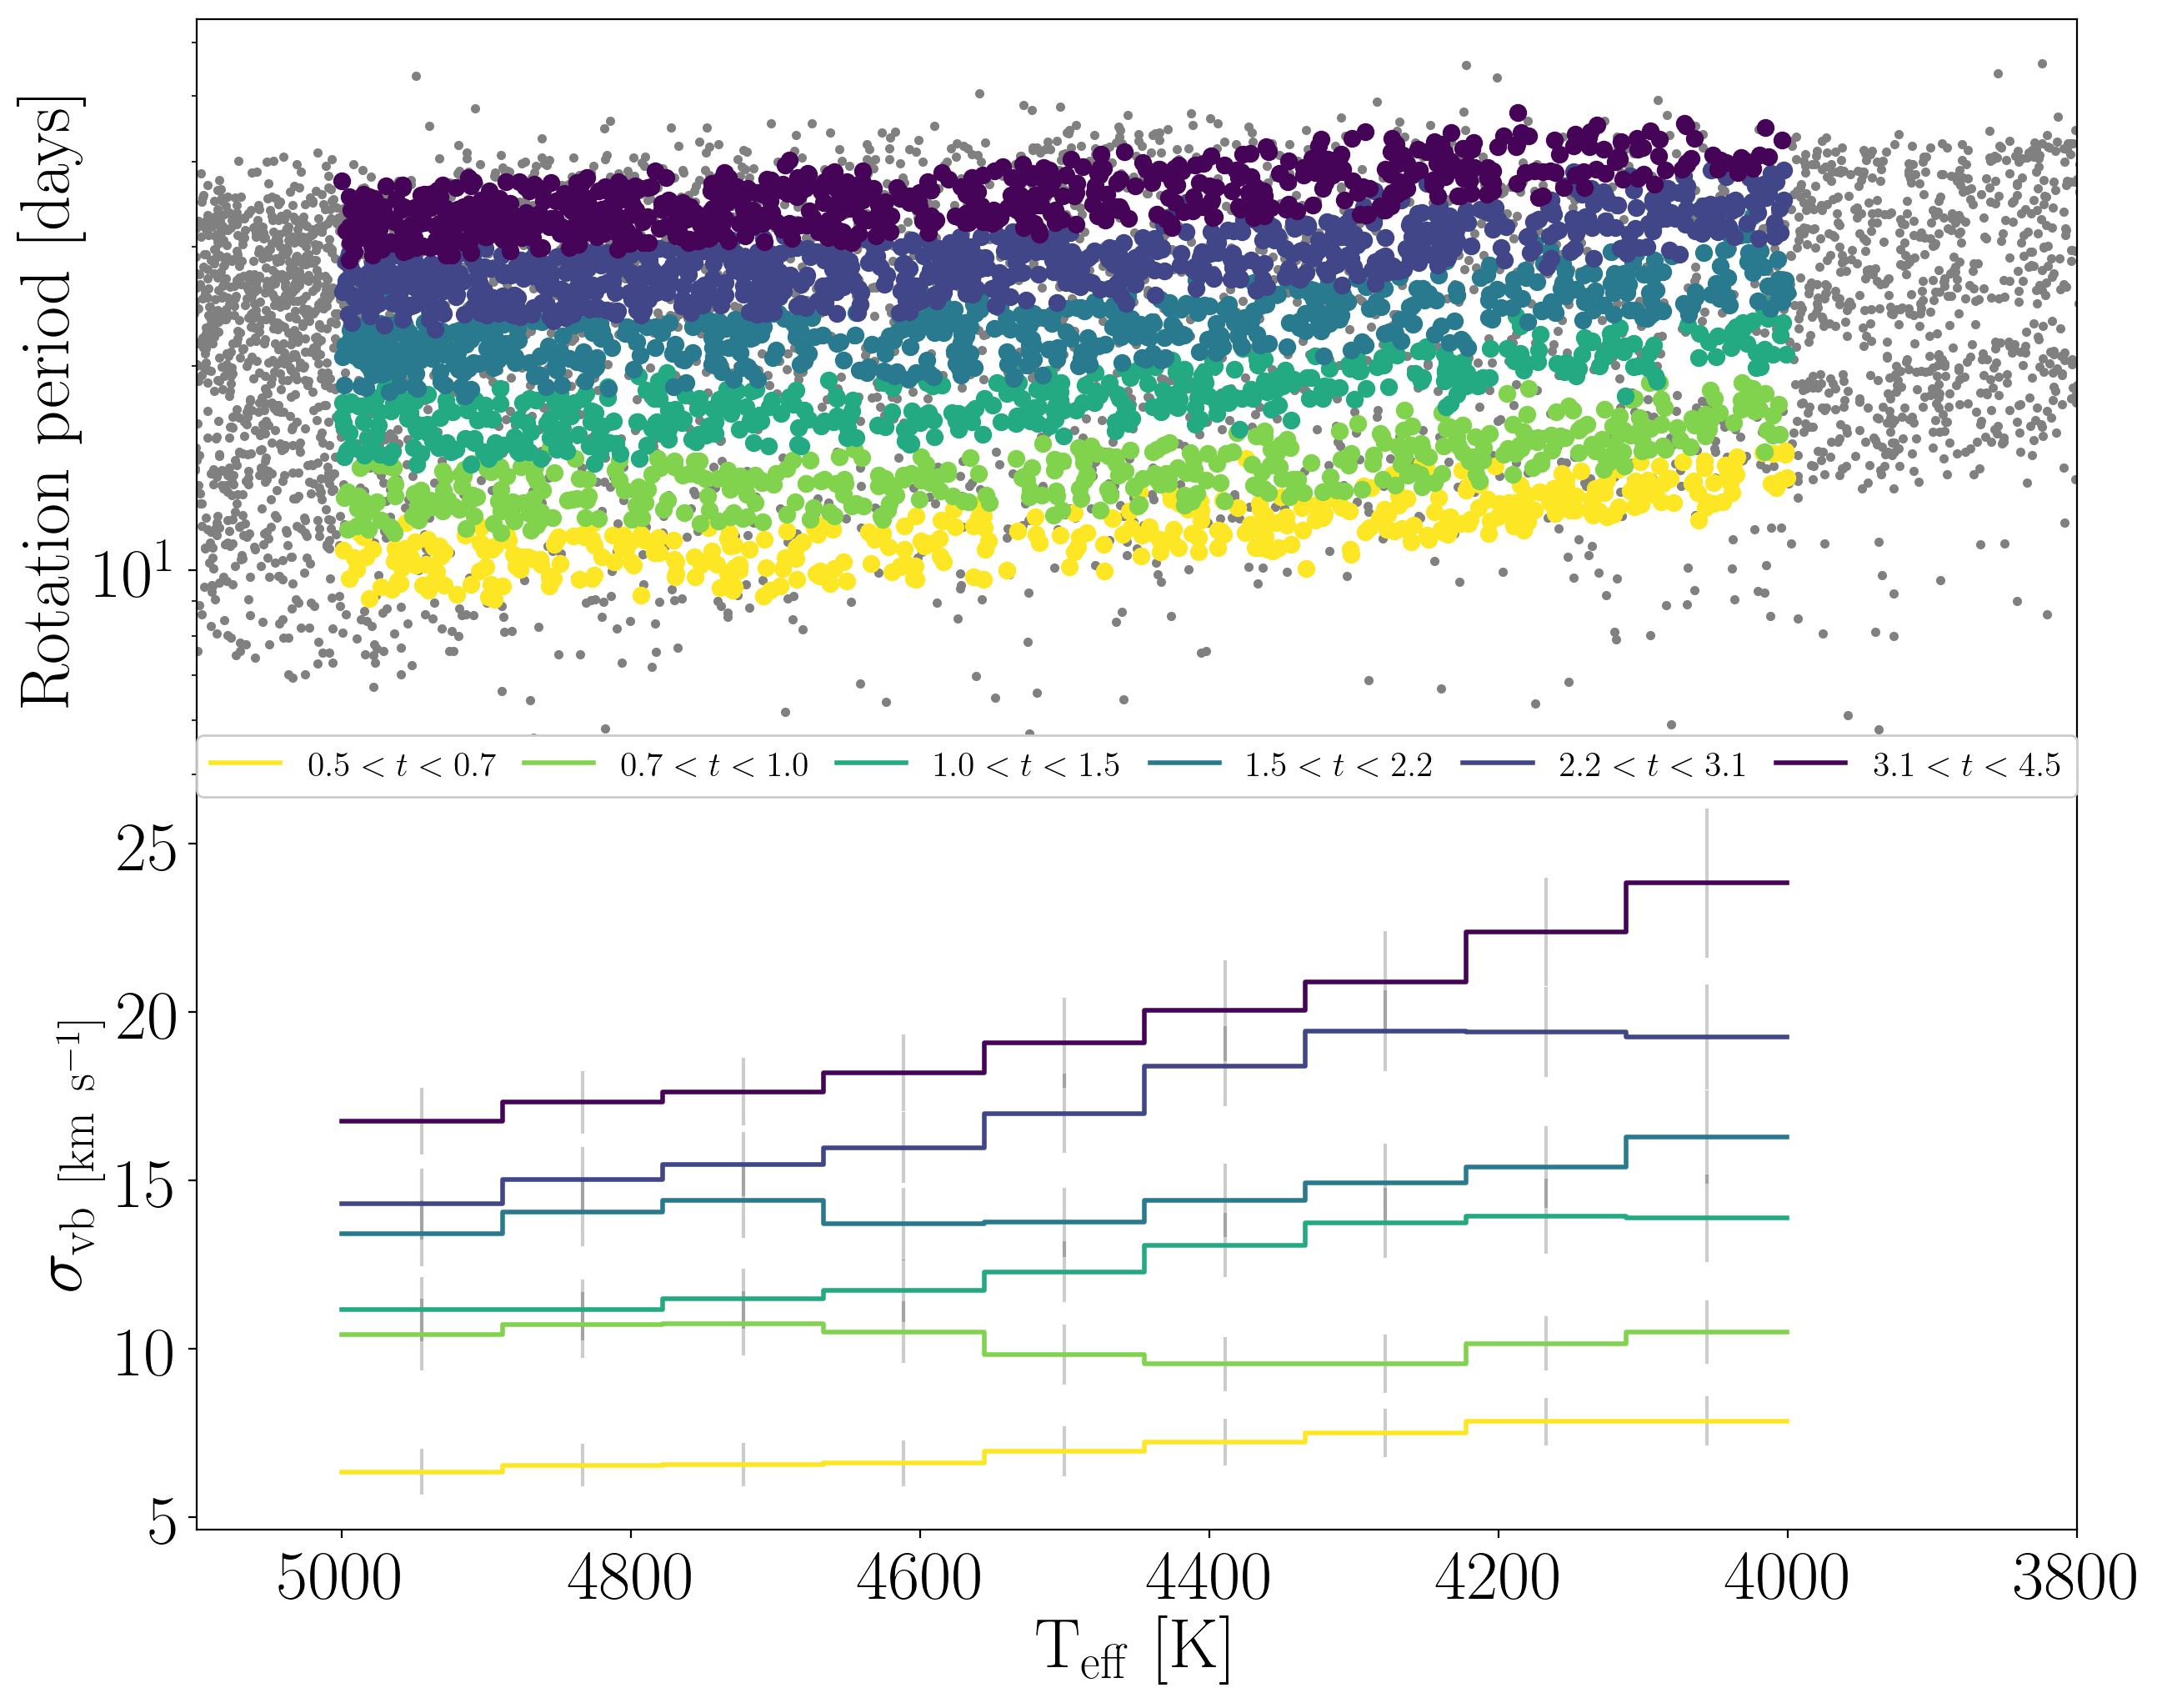

In [86]:
fig = plt.figure(figsize=(16, 12), dpi=200)

ax1 = fig.add_subplot(211)

# Background scatter.
ax1.plot(gaia_mc1.color_teffs, gaia_mc1.Prot, ".", color=".5", rasterized=True, zorder=0)

# Top panel: period-teff relations
for i, m in enumerate(age_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    cb1 = ax1.scatter(x[m][clipping_mask], y[m][clipping_mask], c=rgba[i],
                      vmin=vmin, vmax=vmax, rasterized=True, zorder=1, s=45,
                      label="${0:.1f} < t < {1:.1f}$".format(age_bins[i], age_bins[i+1]))
    
# Add the sun
ax1.scatter(5778, 26, facecolors='w', edgecolors="k", s=200, zorder=3, rasterized=True)
ax1.plot(5778, 26, "k.", zorder=3, rasterized=True)
    
ax1.set_ylim(5, 65)
ax1.set_ylabel("$\mathrm{Rotation~period~[days]}$")
ax1.set_yscale("log")
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(212, sharex=ax1)

# Bottom panel: velocity dispersion-teff relations
for i, m in enumerate(age_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    d, derr, k, kerr = MC_dispersion(x[m][clipping_mask], v_clipped, xerr[m][clipping_mask], 
                                     verr[m][clipping_mask],
                                     tbins, 1000, method="std")
    ds[i, :] = d
    derrs[i, :] = err_on_sample_std_dev(d, len(x[m][clipping_mask]))
#     derrs[i, :] = derr
    midbin = np.diff(tbins)*.5+tbins[:-1]
    cb2 = betterstep_scatter(tbins, d, rgba[i],
                             label="${0:.1f} < t < {1:.1f}$".format(age_bins[i], age_bins[i+1]))
    ax2.errorbar(midbin, d, yerr=derr, fmt=".", zorder=0, ms=.01, color="k", alpha=.2,
                 rasterized=True)
    
ax2.set_xlabel("$\mathrm{T_{eff}~[K]}$")
ax2.set_ylabel("$\sigma_\mathrm{vb~[km~s^{-1}]}$")
ax2.set_xlim(xlim)
plt.legend(bbox_to_anchor=(0., .97, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0., framealpha=.999)

plt.subplots_adjust(hspace=0, right=0.83)
plt.savefig("paper/age_cut.pdf")

Now make cuts in rotation period.

In [68]:
period_bins = 10**np.linspace(np.log10(10), np.log10(50), 9)
mid_period_bins = period_bins[:-1] + .5*np.diff(period_bins)
period_masks = select_stars(gaia_mc, period_bins, "Prot")

pds, pderrs = [np.zeros((len(period_bins), len(tbins[:-1]))) for i in range(2)]

Set the color scale.

In [69]:
vmin, vmax = min(mid_period_bins), max(mid_period_bins)
color_values = (mid_period_bins - vmin)/(vmax - vmin)
rgba = cmap(color_values)

Format the data.

In [70]:
y = gaia_mc.Prot.values

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

niter =  2 3 stars removed kurtosis =  0.013645812445269634
niter =  1 0 stars removed kurtosis =  -0.032543382859139935
niter =  1 0 stars removed kurtosis =  -0.31746423171336513
niter =  2 3 stars removed kurtosis =  -0.10977922919982763
niter =  2 4 stars removed kurtosis =  -0.10954597301449631
niter =  2 1 stars removed kurtosis =  -0.03161960694213217
niter =  2 1 stars removed kurtosis =  -0.1290662309247712
niter =  1 0 stars removed kurtosis =  -0.4463844093890539
niter =  2 3 stars removed kurtosis =  0.013645812445269634


  8%|▊         | 79/1000 [00:00<00:01, 780.93it/s]

niter =  1 0 stars removed kurtosis =  -0.032543382859139935


  8%|▊         | 83/1000 [00:00<00:01, 820.59it/s]

niter =  1 0 stars removed kurtosis =  -0.31746423171336513


  8%|▊         | 81/1000 [00:00<00:01, 802.52it/s]

niter =  2 3 stars removed kurtosis =  -0.10977922919982763


  8%|▊         | 76/1000 [00:00<00:01, 757.85it/s]

niter =  2 4 stars removed kurtosis =  -0.10954597301449631


  7%|▋         | 74/1000 [00:00<00:01, 735.79it/s]

niter =  2 1 stars removed kurtosis =  -0.03161960694213217


  8%|▊         | 80/1000 [00:00<00:01, 793.93it/s]

niter =  2 1 stars removed kurtosis =  -0.1290662309247712


 18%|█▊        | 175/1000 [00:00<00:00, 852.64it/s]

niter =  1 0 stars removed kurtosis =  -0.4463844093890539


100%|██████████| 1000/1000 [00:01<00:00, 847.26it/s]


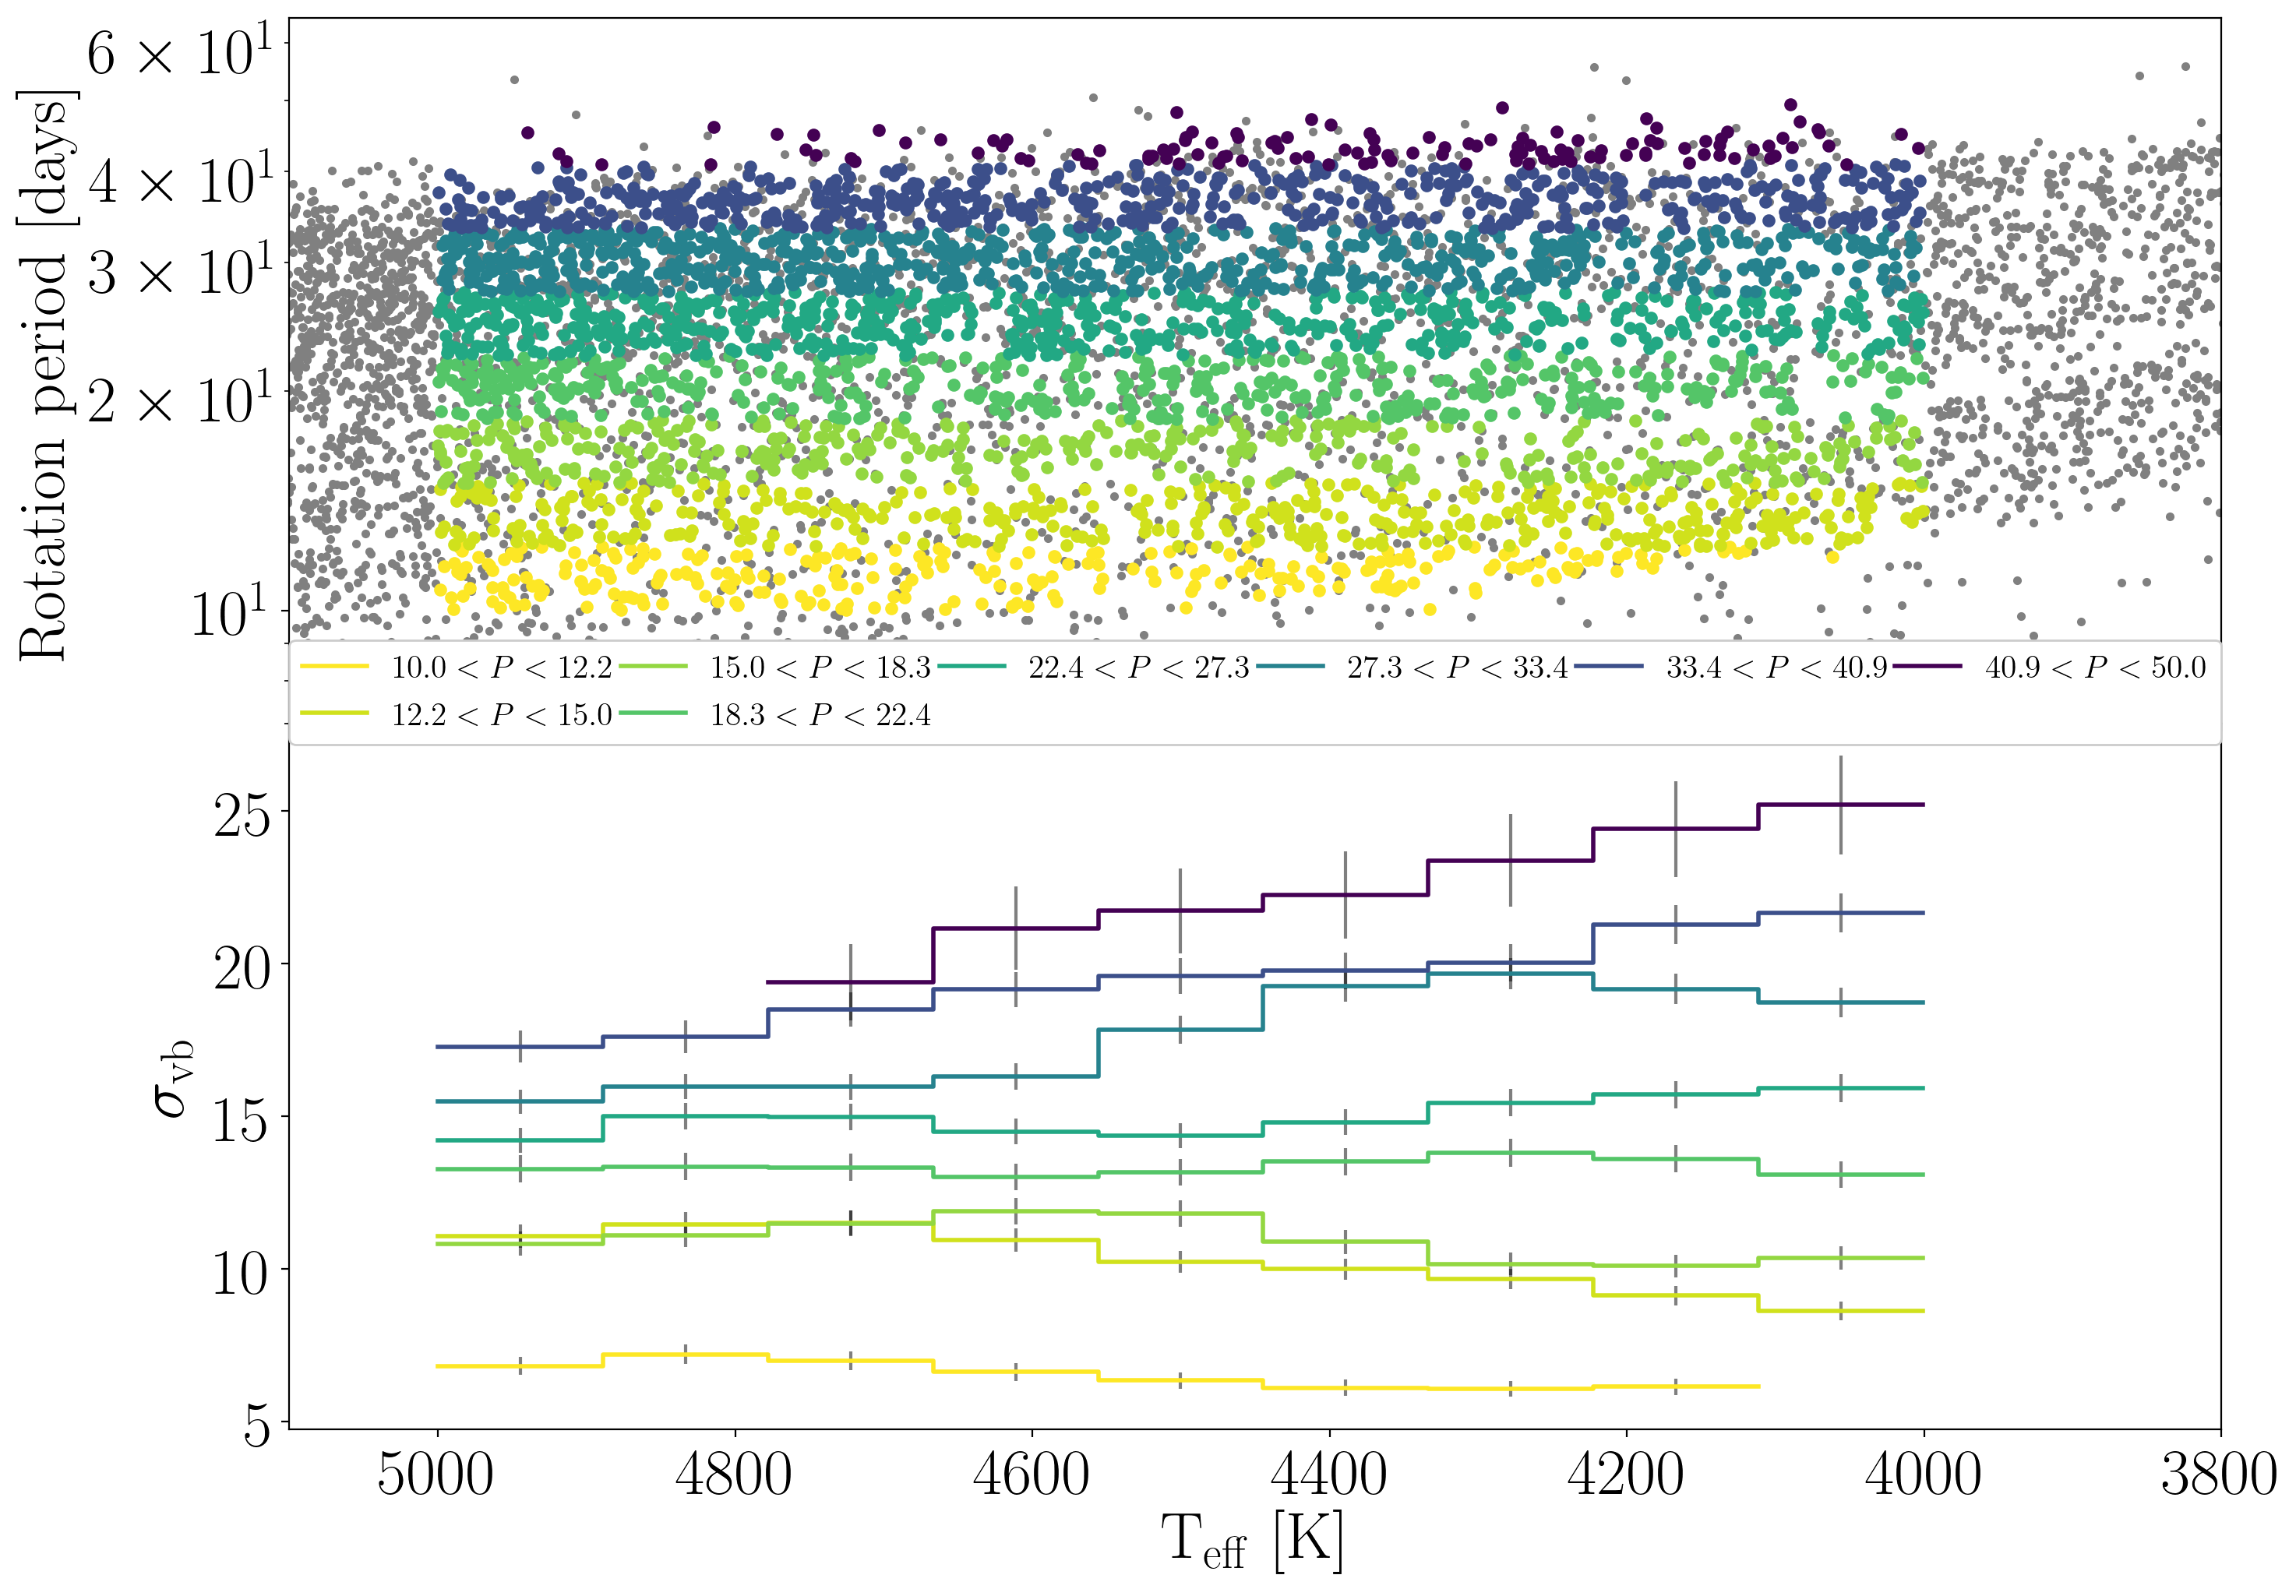

In [71]:
fig = plt.figure(figsize=(16, 12), dpi=200)

ax1 = fig.add_subplot(211)

# Background scatter
ax1.plot(gaia_mc1.color_teffs, gaia_mc1.Prot, ".", color=".5", rasterized=True, zorder=0)

# Colored sections in period-color space
for i, m in enumerate(period_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    cb1 = ax1.scatter(x[m][clipping_mask], y[m][clipping_mask], c=rgba[i],
                      vmin=vmin, vmax=vmax, rasterized=True, zorder=1, s=25,
                      label="${0:.1f} < P < {1:.1f}$".format(period_bins[i], period_bins[i+1]))
    
# Sun
ax1.scatter(5778, 26, facecolors='w', edgecolors="k", s=200, zorder=3, rasterized=True)
ax1.plot(5778, 26, "k.", zorder=3, rasterized=True)
    
ax1.set_ylim(7, 65)
ax1.set_ylabel("$\mathrm{Rotation~period~[days]}$")
ax1.set_yscale("log")
plt.setp(ax1.get_xticklabels(), visible=False)

# Velocity-teff plot
ax2 = fig.add_subplot(212, sharex=ax1)

# Bottom panel: velocity dispersion-teff relations
for i, m in enumerate(period_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    d, derr, k, kerr = MC_dispersion(x[m][clipping_mask], v_clipped,
                                     xerr[m][clipping_mask], verr[m][clipping_mask],
                            tbins, 1000, method="std")
    derr = err_on_sample_std_dev(d, len(x[m][clipping_mask]))
    pds[i, :] = d
    pderrs[i, :] = err_on_sample_std_dev(d, len(x[m][clipping_mask]))

    midbin = np.diff(tbins)*.5+tbins[:-1]
    cb2 = betterstep_scatter(tbins, d, rgba[i],
                             label="${0:.1f} < P < {1:.1f}$".format(period_bins[i], period_bins[i+1]))
    ax2.errorbar(midbin, d, yerr=derr, fmt=".", zorder=0, ms=.01, color="k", alpha=.5,
                 rasterized=True)

plt.legend(bbox_to_anchor=(0., .97, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0., framealpha=.999)
ax2.set_xlabel("$\mathrm{T_{eff}~[K]}$")
ax2.set_ylabel("$\sigma_\mathrm{vb}$")
ax2.set_xlim(xlim)
plt.subplots_adjust(hspace=0)  # , right=0.83)
plt.savefig("paper/period_cut.pdf")

In [72]:
vmin, vmax = np.min(ds[ds > 0]), np.max(ds)
color_values = (ds - vmin)/(vmax - vmin)
rgba = cmap(color_values)

pvmin, pvmax = np.min(pds[pds > 0]), np.max(pds[np.isfinite(pds)])
pcolor_values = (pds - pvmin)/(pvmax - pvmin)
prgba = cmap(pcolor_values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


niter =  2 3 stars removed kurtosis =  0.013645812445269634
niter =  1 0 stars removed kurtosis =  -0.032543382859139935
niter =  1 0 stars removed kurtosis =  -0.31746423171336513
niter =  2 3 stars removed kurtosis =  -0.10977922919982763
niter =  2 4 stars removed kurtosis =  -0.10954597301449631
niter =  2 1 stars removed kurtosis =  -0.03161960694213217
niter =  2 1 stars removed kurtosis =  -0.1290662309247712
niter =  1 0 stars removed kurtosis =  -0.4463844093890539


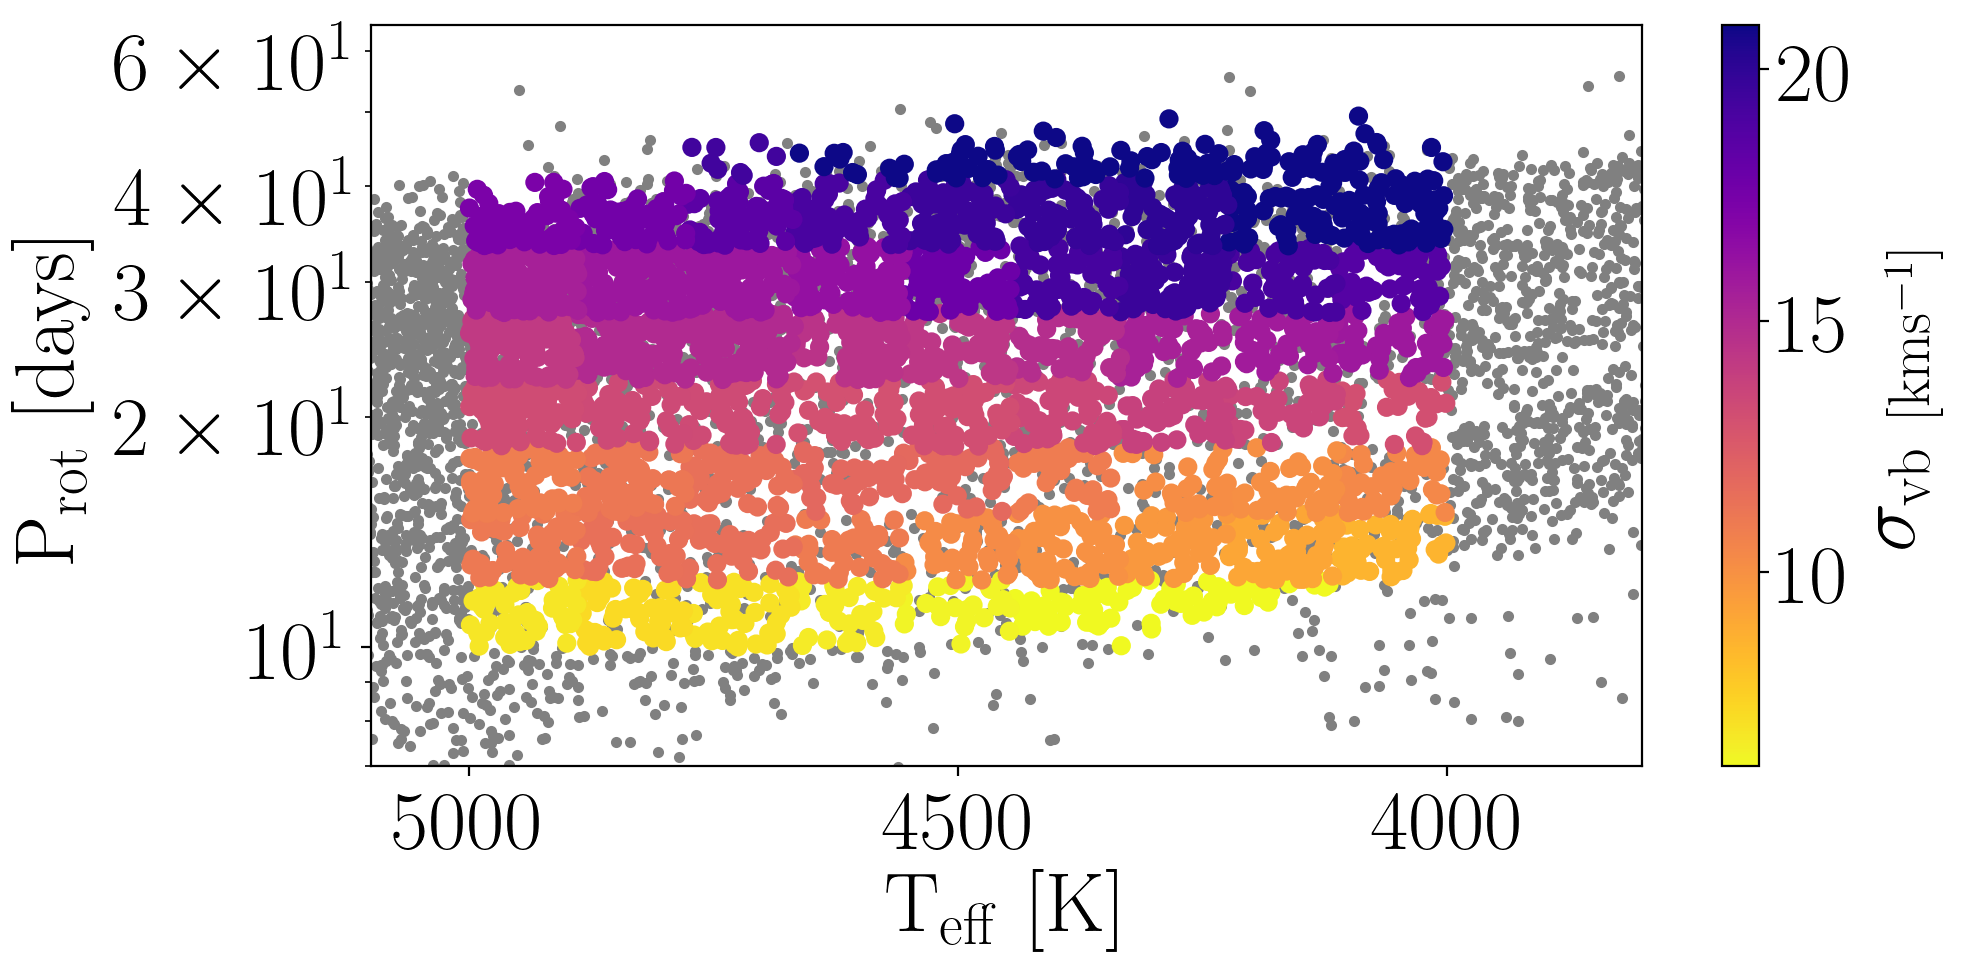

In [73]:
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(gaia_mc1.color_teffs, gaia_mc1.Prot, ".", color=".5", rasterized=True, zorder=0)

# for i, m in enumerate(age_masks):
for i, m in enumerate(period_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    
    for j in range(len(tbins)-1):
        tm = (x[m][clipping_mask] > tbins[j]) * (x[m][clipping_mask] < tbins[j+1])
        cb1 = plt.scatter(x[m][clipping_mask][tm], y[m][clipping_mask][tm],
                          c=np.ones_like(y[m][clipping_mask][tm])*pds[i, j],
                          vmin=vmin, vmax=vmax,
                          rasterized=True, zorder=1, s=35, cmap="plasma_r")

plt.colorbar(cb1, label="$\sigma_\mathrm{vb~[kms^{-1}]}$")
plt.xlabel("$\mathrm{T_{eff}~[K]}$")
plt.ylabel("$\mathrm{P_{rot}~[days]}$")
plt.xlim(xlim)
plt.yscale("log")
plt.ylim(7, 65)
plt.tight_layout()
# plt.savefig("paper/dispersion_period_teff.pdf")